<a href="https://colab.research.google.com/github/Vikraman46-sh/Vikraman46-sh/blob/main/Logistic%20regression%20from%20scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [56]:
class LogisticsRegression():
    def __init__(self,learning_rate,iterations):
        self.learning_rate=learning_rate
        self.iterations=iterations
        
    def fit(self,X,Y):
        self.m,self.n=X.shape
        self.W=np.zeros(self.n)
        self.b=0
        self.X=X
        self.Y=Y
        
        for i in range(self.iterations):
            self.update_weights()
        return self
    
    def update_weights(self):
        A=1/(1+np.exp(-(self.X.dot(self.W)+self.b)))
        
        tmp=(A-self.Y.T)
        tmp=np.reshape(tmp,self.m)
        dW=np.dot(self.X.T,tmp)/self.m
        db=np.sum(tmp)/self.m
        
        self.W=self.W-self.learning_rate*dW
        self.b=self.b-self.learning_rate*db
        
        return self
    
    
    def predict(self,X):
        Z=1/(1+np.exp(-(self.X.dot(self.W)+self.b)))
        Y=np.where(Z>0.5,1,0)
        return Y

In [16]:

data=pd.read_csv("/content/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: >

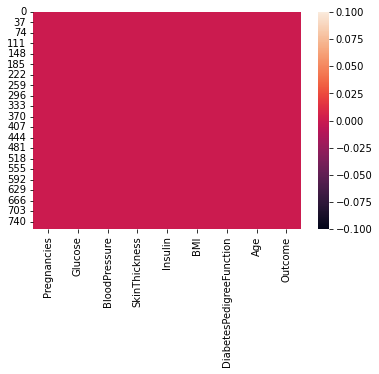

In [20]:
sns.heatmap(data.isnull())

In [21]:
correlation=data.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [42]:
X=data.drop(['SkinThickness','DiabetesPedigreeFunction','Outcome'],axis=1)
X

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,Age
0,6,148,72,0,33.6,50
1,1,85,66,0,26.6,31
2,8,183,64,0,23.3,32
3,1,89,66,94,28.1,21
4,0,137,40,168,43.1,33
...,...,...,...,...,...,...
763,10,101,76,180,32.9,63
764,2,122,70,0,36.8,27
765,5,121,72,112,26.2,30
766,1,126,60,0,30.1,47


In [43]:
Y=data["Outcome"]
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [57]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [60]:
predict_model=LogisticsRegression(learning_rate=0.01,iterations=1000)
predict_model.fit(X_train,Y_train)
prediction_results=predict_model.predict(X_test)
print(prediction_results)

[1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 1 0 

In [61]:
count=0
correctly_classify=0
for count in range(np.size(prediction_results)):
  if Y[count]==prediction_results[count]:
    correctly_classify=correctly_classify+1

  count=count+1

print("accuracy",(correctly_classify/count)*100)

accuracy 58.306188925081436


In [63]:
model=LogisticRegression()
model.fit(X_train,Y_train)
model_predict=model.predict(X_test)
print(model_predict)

[0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [64]:
accuracy=accuracy_score(model_predict,Y_test)
print(accuracy)

0.7207792207792207
